# Time Series Analysis

In [2]:
import scipy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Daily female births time series data

In [5]:
series = pd.read_csv("../data/daily-total-female-births.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


In [7]:
series.size

365

In [8]:
series["1959-01"]

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64

Descriptive Statistics of series

In [9]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


### Feature Engineering

A time series datset must be transformed to be modeled as as supervise learning problem.

Column A | Column B 
---------|----------
time 1 | value 1
time 2 | value 2
time 3 | value3

In [12]:
temperature = pd.read_csv("../data/daily-min-temp.csv",header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame()
df['month'] = [temperature.index[i].month for i in range(len(temperature))]
df['day'] = [temperature.index[i].day for i in range(len(temperature))]
df['temperature'] = [temperature[i] for i in range(len(temperature))]
print(temperature.head())
print(df.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64
   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


### Lag features

The simplest approach is to predict the value at next time (t+1) from the value at current time (t).

Shifted | original
--------|---------
NaN | 20.7
20.7 | 17.9
17.9 | 18.8

In [16]:
temps = pd.DataFrame(temperature.values)
print(temps.head())

temp_shift_df = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
temp_shift_df.columns = ['t-2','t-1','t', 't+1']
print(temp_shift_df.head())

      0
0  20.7
1  17.9
2  18.8
3  14.6
4  15.8
    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


Rolling windows statistics

In [17]:
temps_rolling = pd.DataFrame(temperature.values)
shifted = temps_rolling.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
df_roll = pd.concat([means, temps_rolling], axis=1)
df_roll.columns = ['mean(t-1,t)','t']
print(df_roll.head())

   mean(t-1,t)     t
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [18]:
temps_window_expanding = pd.DataFrame(temperature.values)
window = temps_window_expanding.expanding()
df_window_expanding = pd.concat([window.min(),window.mean(),window.max(), temps_window_expanding.shift(-1)], axis=1)
df_window_expanding.columns = ['min','mean','max','t+1']
print(df_window_expanding.head())

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


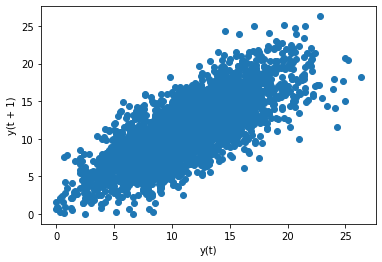

In [19]:
from pandas.plotting import lag_plot
lag_plot(temperature)
plt.show()

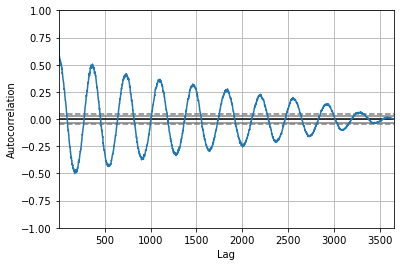

In [20]:
# auto-correlation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temperature)
plt.show()